In [1]:
from scipy import sparse
import numpy as np
#import 
eye = np.eye(4)
print("Eye Numpy Array:\n{}".format(eye))
sparse_matrix = sparse.csr_matrix(eye)
print("SParse Matrix:\n{}".format(sparse_matrix))
sparcity = 1.0 - np.count_nonzero(eye)/np.size(eye)
print(sparcity)

Eye Numpy Array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
SParse Matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
0.75


In [2]:
import sys
print(sys.version)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


In [3]:
import pandas as pd
print("Pandas Version: {}".format(pd.__version__))

Pandas Version: 0.24.2


In [4]:
import numpy as np
print("Numpy Version: {}".format(np.__version__))

Numpy Version: 1.16.4


In [5]:
import scipy as sp
print("SciPy Version: {}".format(sp.__version__))

SciPy Version: 1.2.1


In [6]:
import sklearn as sk
print("Scikit-learn Version: {}".format(sk.__version__))

Scikit-learn Version: 0.21.2


In [7]:
import IPython
print("IPython Version: {}".format(IPython.__version__))

IPython Version: 7.6.1


In [8]:
data = np.ones(4)
print(data)
row_indices = np.arange(4)
col_indices = np.arange(4)
print(row_indices)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

[1. 1. 1. 1.]
[0 1 2 3]
COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [9]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(iris_dataset["target"])
print("Shape of Iris: {}".format(iris_dataset.data.shape))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Shape of Iris: (150, 4)


In [10]:
print("Keys of Iris dataset: {}".format(iris_dataset.keys()))

Keys of Iris dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
print(iris_dataset["DESCR"][:50]+"\n..")

.. _iris_dataset:

Iris plants dataset
-----------
..


In [12]:
print("Target Names: {}".format(iris_dataset["target_names"]))
print("Sample count per class: {}".format({n:v for n,v in zip(iris_dataset["target_names"],np.bincount(iris_dataset["target"]))}))

Target Names: ['setosa' 'versicolor' 'virginica']
Sample count per class: {'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [13]:
print('Features: {}'.format(iris_dataset["feature_names"]))

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
print("Data type of Data: {}".format(type(iris_dataset["data"])))
#print(iris_dataset["data"].dtype)
print(iris_dataset["data"].shape)
print("Data type of Target: {}".format(type(iris_dataset["target"])))
print(iris_dataset["target"].shape)

Data type of Data: <class 'numpy.ndarray'>
(150, 4)
Data type of Target: <class 'numpy.ndarray'>
(150,)


In [15]:
from sklearn.model_selection import train_test_split
xTest, xTrain, yTest, yTrain = train_test_split(iris_dataset["data"],iris_dataset["target"],random_state=0,test_size=0.5)
print("X Test shape: {}".format(xTest.shape))
print("X Train shape: {}".format(xTrain.shape))
print("Y Test shape: {}".format(yTest.shape))
print("Y Train shape: {}".format(yTrain.shape))

X Test shape: (75, 4)
X Train shape: (75, 4)
Y Test shape: (75,)
Y Train shape: (75,)


In [1]:
#print(xTrain,yTrain)

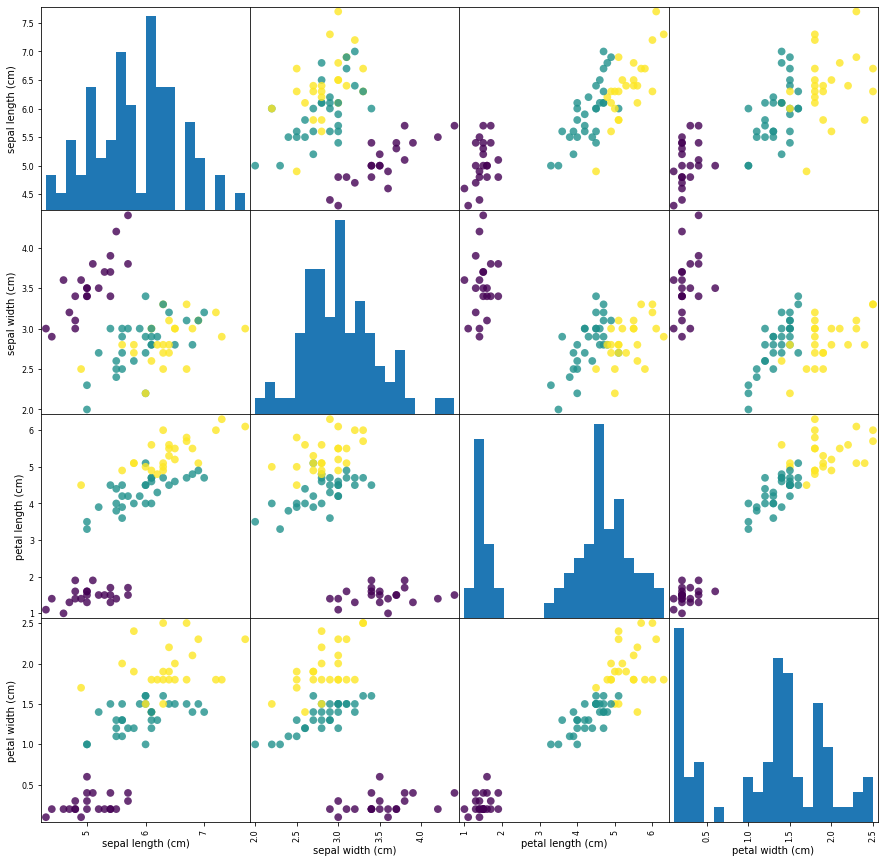

In [25]:
iris_dataframe = pd.DataFrame(data = xTrain, columns = iris_dataset["feature_names"])
#print(iris_dataframe)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=yTrain, figsize = (15,15), marker="o",hist_kwds={'bins': 20},s=60,alpha=.8)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
X_new = np.array([[5,2.9,1,0.2]])
print("Shape of mew array: {}".format(X_new.shape))

Shape of mew array: (1, 4)


In [20]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset["target_names"][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [21]:
y_predict = knn.predict(xTest)
print("Test set prediction: {}".format(y_predict))

Test set prediction: [0 2 1 0 2 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 2 1 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2
 0]


In [22]:
print("Test set score: {:.2f}".format(np.mean(yTest == y_predict)))
print("KNN Test set score: {:.2f}".format(knn.score(xTest,yTest)))

Test set score: 0.96
KNN Test set score: 0.96


In [27]:
prediction1 = knn.predict(xTest)
print("Prediction on test data: {}".format(prediction1))
print("Prediction on test data (Target Name): {}".format(iris_dataset["target_names"][prediction1]))

Prediction on test data: [0 2 1 0 2 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 2 1 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2
 0]
Prediction on test data (Target Name): ['setosa' 'virginica' 'versicolor' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica' 'virginica'
 'setosa' 'setosa' 'virginica' 'virginica' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa'
 'setosa' 'versicolor' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica'
 'setosa' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'set

In [32]:
print("Test set score: {:.2f}".format(np.mean(yTest == prediction1)))
print("KNN Test set score: {:.2f}".format(knn.score(xTest,yTest)))

Test set score: 0.96
KNN Test set score: 0.96


In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8      